In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [2]:
INPUT_FILE_sec1 = "300_job_industry_skill.csv"
INPUT_PATH_sec1 = os.path.join("../data", INPUT_FILE_sec1)
skills=pd.read_csv(INPUT_PATH_sec1)

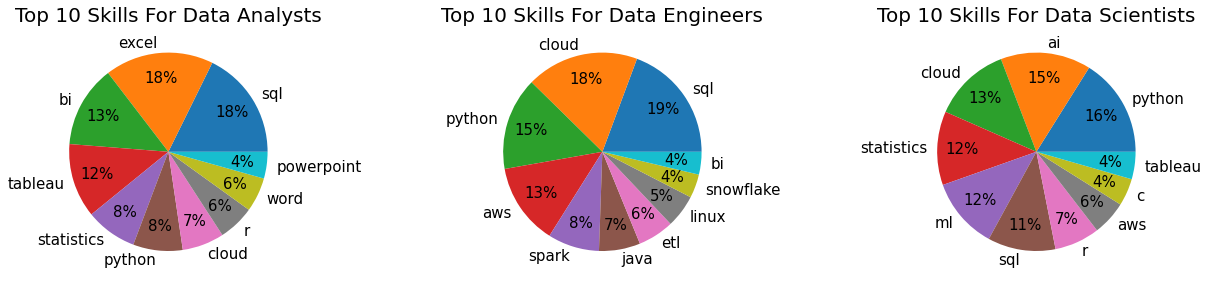

In [3]:
skills_df = skills.set_index('Title')
skills_df = skills_df.loc[['Data Analyst','Data Scientist','Data Engineer'], ['math', 'statistics', 'python', 'r', 'sql', 'java', 'stata', 'tableau', 'spark', 'excel', 'word', 'powerpoint', 'bi', 'etl', 'aws', 'snowflake', 'cloud', 'matlab', 'ai', 'ml', 'c', 'linux', 'pytorch', 'nlp', 'pandas', 'matplotlib', 'hive']]
skills_groups = skills_df.groupby('Title')
skills_groups2 = skills_groups.sum().T

fig, axes = plt.subplots(1, 3, figsize=(20, 20))

data_ana_sor = skills_groups2['Data Analyst'].sort_values(ascending=False)
data_ana_sor_top = data_ana_sor.head(10)
data_ana_sor_top
data_ana_sor_top.index.name = 'skills'
new_index_ana_top = data_ana_sor_top.reset_index()
industry_df1_top = new_index_ana_top.rename(columns={'Title':'Data Analyst'})

axes[0].set_title('Top 10 Skills For Data Analysts',fontsize="20")
axes[0].pie(industry_df1_top['Data Analyst'] , autopct = '%0.f%%',pctdistance=0.75,textprops={'fontsize': 15},
       labels = industry_df1_top['skills']);

data_eng_sor = skills_groups2['Data Engineer'].sort_values(ascending=False)

data_eng_sor_top = data_eng_sor.head(10)
data_eng_sor_top.index.name = 'skills'
new_index_eng_top = data_eng_sor_top.reset_index()
industry_df2_top = new_index_eng_top.rename(columns={'Title':'Data Engineer'})

axes[1].set_title('Top 10 Skills For Data Engineers',fontsize="20")
axes[1].pie(industry_df2_top['Data Engineer'] , autopct = '%0.f%%',pctdistance=0.75,textprops={'fontsize': 15},
       labels = industry_df2_top['skills']);

data_sci_sor = skills_groups2['Data Scientist'].sort_values(ascending=False)
data_sci_sor_top = data_sci_sor.head(10)
data_sci_sor_top

data_sci_sor_top.index.name = 'skills'
new_index_sci_top = data_sci_sor_top.reset_index()
industry_df3_top = new_index_sci_top.rename(columns={'Title':'Data Scientist'})
industry_df3_top
# industry_df3['Data Scientist']

axes[2].set_title('Top 10 Skills For Data Scientists',fontsize="20")
axes[2].pie(industry_df3_top['Data Scientist'] , autopct = '%0.f%%',pctdistance=0.75,textprops={'fontsize': 15},
       labels = industry_df3_top['skills']);
fig.subplots_adjust(wspace=0.75)
fig.savefig('../figure/figure1.png', dpi=100)

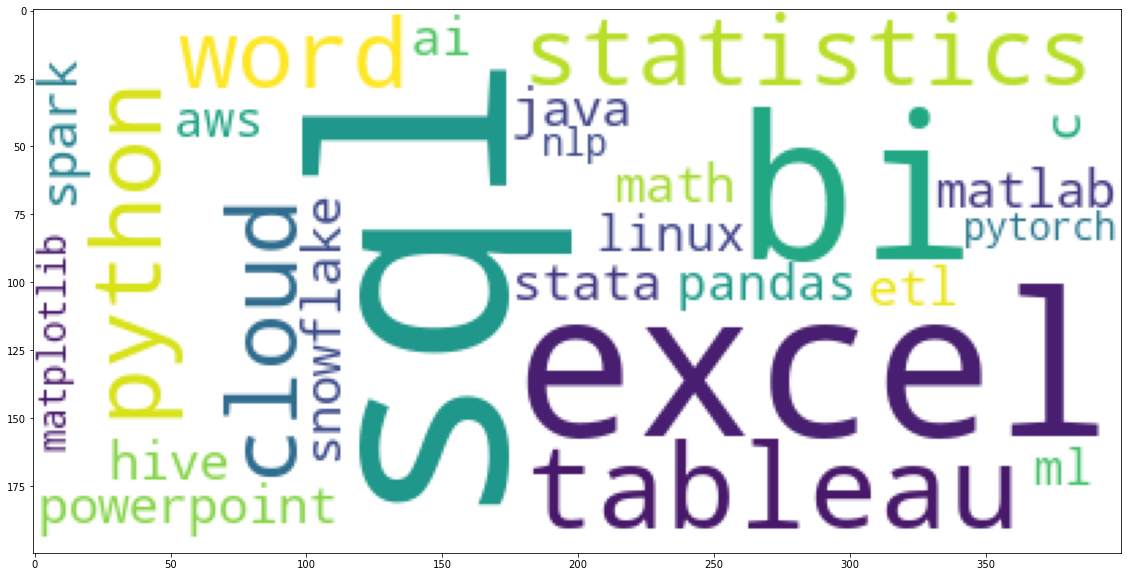

<Figure size 432x288 with 0 Axes>

In [4]:
data_ana_sor.index.name = 'skills'
new_index_ana = data_ana_sor.reset_index()
industry_df_ana = new_index_ana.rename(columns={'Title':'Data Analyst'})

# Generate a word cloud
wordcloud_ana = WordCloud(background_color="white", max_words=5000, contour_width=3, 
contour_color='blue').generate(' '.join(industry_df_ana['skills']))
# wordcloud.generate(industry_df1['skills'])# Visualize the word cloud
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud_ana)
plt.show()
plt.savefig('../figure/figure1-1.png')

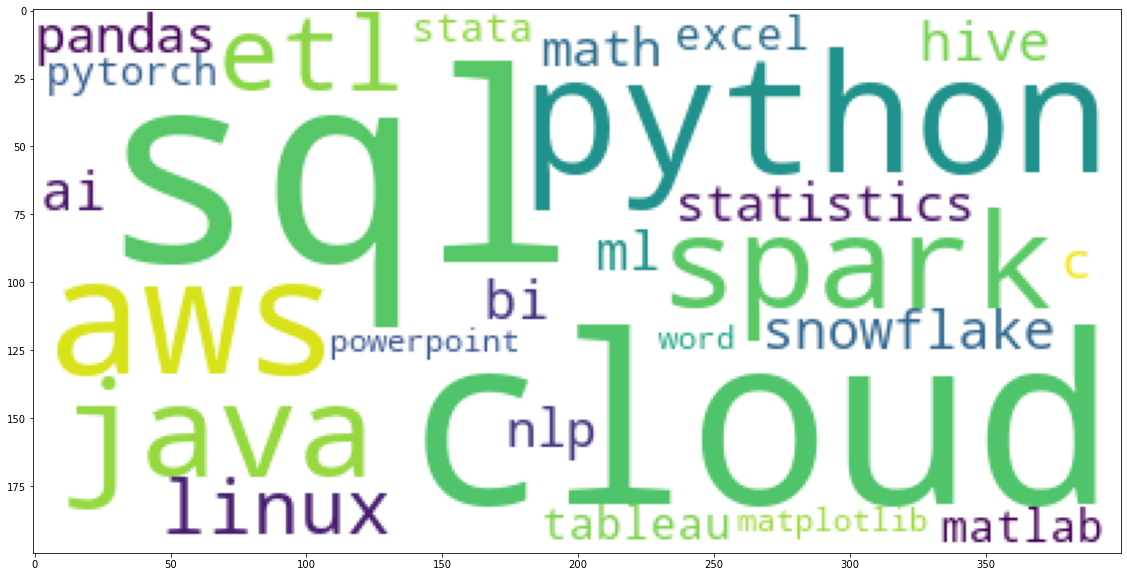

<Figure size 432x288 with 0 Axes>

In [5]:
data_eng_sor.index.name = 'skills'
new_index_eng = data_eng_sor.reset_index()
industry_df_eng = new_index_eng.rename(columns={'Title':'Data Engineer'})
industry_df_eng
# Generate a word cloud
wordcloud_eng = WordCloud(background_color="white", max_words=5000, contour_width=3, 
contour_color='steelblue').generate(' '.join(industry_df_eng['skills']))
# wordcloud.generate(industry_df1['skills'])# Visualize the word cloud
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud_eng)
plt.show()
plt.savefig('../figure/figure1-2.png')

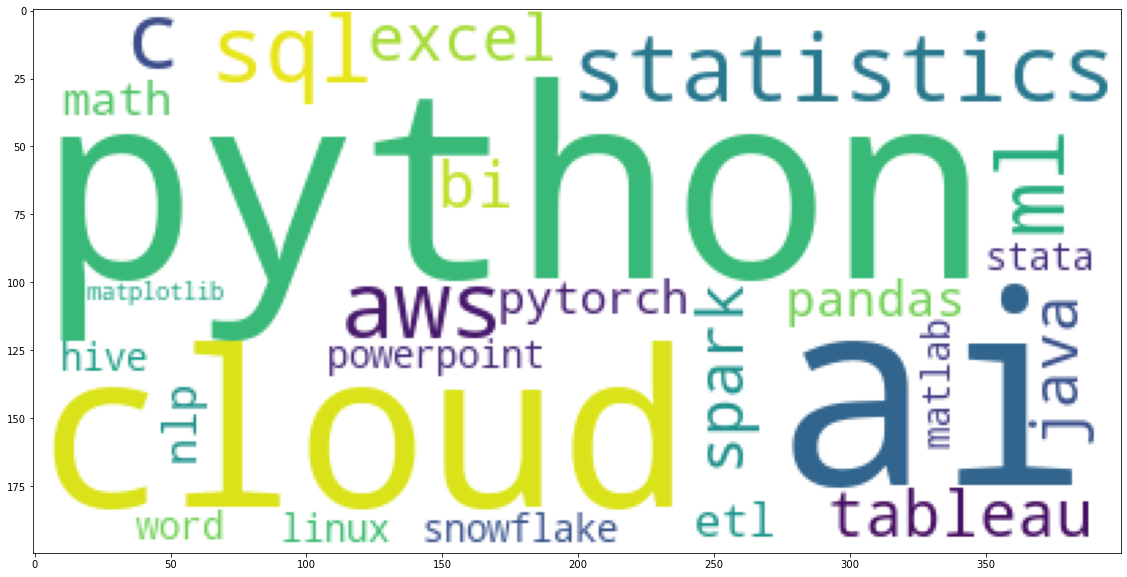

<Figure size 432x288 with 0 Axes>

In [6]:
data_sci_sor.index.name = 'skills'
new_index_sci = data_sci_sor.reset_index()
industry_df_sci = new_index_sci.rename(columns={'Title':'Data Scientist'})
industry_df_sci
# Generate a word cloud
wordcloud_sci = WordCloud(background_color="white", max_words=5000, contour_width=3, 
contour_color='steelblue').generate(' '.join(industry_df_sci['skills']))
# wordcloud.generate(industry_df1['skills'])# Visualize the word cloud
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud_sci)
plt.show()
plt.savefig('../figure/figure1-3.png')

In [7]:
IN_PATH_indeed = os.path.join('../data', 'job_list.csv')
indeed = pd.read_csv(IN_PATH_indeed)

In [8]:
state_counts = indeed.groupby(['location','title'])['job_id'].size().unstack(fill_value=0)

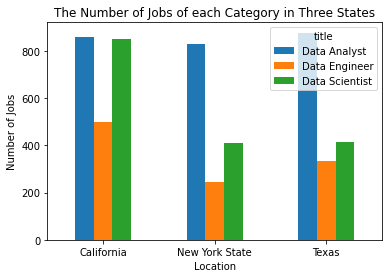

In [9]:
state_counts.plot.bar(rot=0)
plt.title('The Number of Jobs of each Category in Three States')
plt.ylabel('Number of Jobs')
plt.xlabel('Location')
plt.savefig('../figure/figure2.png', bbox_inches = 'tight', dpi=100)

In [10]:
company_top20 = indeed.groupby(['company_name'])['job_id'].count().to_frame().sort_values(['job_id'], ascending=[False]).head(20)
company_top20

,job_id
company_name,
"JPMorgan Chase Bank, N.A.",76
Visa,56
Deloitte,54
Amazon.com Services LLC,52
Citi,40
Google,33
KPMG,32
IBM,26
PRICE WATERHOUSE COOPERS,23


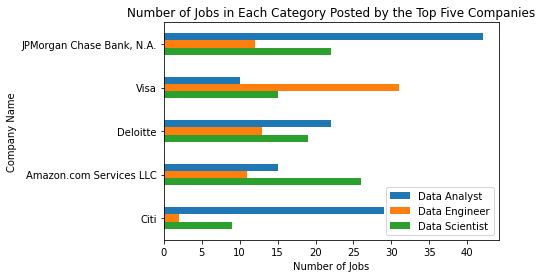

In [11]:
company_top5 = company_top20.head(5)
company_top5_2= indeed.groupby(['company_name','title'])['job_id'].size().unstack(fill_value=0)
company_top5_count = pd.merge(company_top5, company_top5_2, how = 'left', on = ['company_name'])
company_top5_count = company_top5_count[['Data Analyst','Data Engineer','Data Scientist']]
company_top5_count.plot(kind='barh')
plt.title('Number of Jobs in Each Category Posted by the Top Five Companies')
plt.xlabel('Number of Jobs')
plt.ylabel('Company Name')
ax=plt.gca()
ax.invert_yaxis() 
plt.savefig('../figure/figure3.png', bbox_inches = 'tight', dpi=100)

In [14]:
IN_PATH_industry = os.path.join('../data', '300_job_industry_skill.csv')
industry = pd.read_csv(IN_PATH_industry)

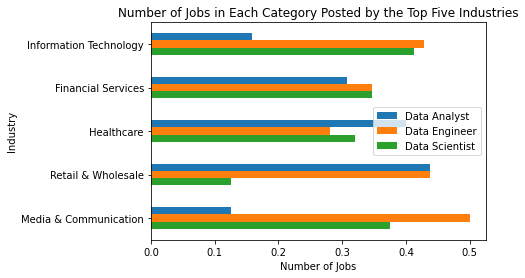

In [15]:
industry_top5 = industry.groupby(['Industry'])['jid'].count().to_frame().sort_values(['jid'], ascending=[ False]).head(5)
industry_top5_2= industry.groupby(['Industry','Title'])['jid'].count().unstack(fill_value=0)
industry_top5_count = pd.merge(industry_top5, industry_top5_2, how = 'left', on = ['Industry'])
industry_top5_count = industry_top5_count[['Data Analyst','Data Engineer','Data Scientist']]
industry_top5_count['Sum'] = industry_top5_count.apply(lambda x: x['Data Analyst'] + x['Data Engineer'] + x['Data Scientist'], axis=1)
industry_top5_count['Data Analyst'] = industry_top5_count.apply(lambda x: x['Data Analyst']/(x['Sum']), axis=1)
industry_top5_count['Data Engineer'] = industry_top5_count.apply(lambda x: x['Data Engineer']/(x['Sum']), axis=1)
industry_top5_count['Data Scientist'] = industry_top5_count.apply(lambda x: x['Data Scientist']/(x['Sum']), axis=1)
industry_top5_count_new = industry_top5_count[['Data Analyst','Data Engineer','Data Scientist']]
industry_top5_count_new
industry_top5_count_new.plot(kind='barh')
plt.title('Number of Jobs in Each Category Posted by the Top Five Industries')
plt.xlabel('Number of Jobs')
plt.ylabel('Industry')
ax=plt.gca()
ax.invert_yaxis() 
plt.savefig('../figure/figure4.png', bbox_inches = 'tight', dpi=100)

In [ ]:
IN_PATH_industry = os.path.join('../data', 'basic_info.csv')
industry = pd.read_csv(IN_PATH_industry)
df.groupby(['location','title'])['salary_mean'].mean().unstack(fill_value=0).plot.bar(rot=0,title="Salary ")
sns.boxplot(y='salary_mean',data=df,x='title',hue='location')